In [65]:
# import all necessary libs 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# read data from the scv 's
train_path = 'data/train.csv'
test_path = 'data/test.csv'

train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [67]:
# print out the data set && check the loop
print("--------------Train Set--------------")
print(train_set[:5])
print("--------------Test Set--------------")
print(test_set[:5])

--------------Train Set--------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

In [68]:
# check out what feature the data set we have ?
print(sorted(train_set.columns.tolist()))
print(sorted(test_set.columns.tolist()))

['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket']
['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket']


#Some side note here for each paramters
1. Age: 
2. Cabin: 船舱
3. Embarked: 登船港口
4. Fare: 船票价格
5. Name: 姓名
6. Parch: 直系亲属数量（父母/子女）
7. PassengerId: 乘客ID
8. Pclass: 船舱等级（客舱等级）
9. Sex: 性别
10. SibSp:  旁系亲属数量（兄弟姐妹/配偶）
11. Ticket: 船票号码

In [69]:
train_res = train_set['Survived'].tolist()
print(train_res[:5])
print(train_set[:5])

[0, 1, 1, 1, 0]
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [70]:
# simple 'Feature Engineering part'

#Step: 1 check if there any missing data? if there any fill it up
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
print(train_set["Embarked"].mode().values[0])
print(train_set["Age"].median())

S
28.0


In [73]:
#============================ Step 1 : data cleaning part =====================================
# small numbers of missing value could fill up with the mean | median | mode number of the feature 
train_set["Age"].fillna(train_set["Age"].median(), inplace=True)
train_set["Embarked"].fillna(str(train_set["Embarked"].mode().values[0]), inplace=True)

In [74]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Survival Rate')

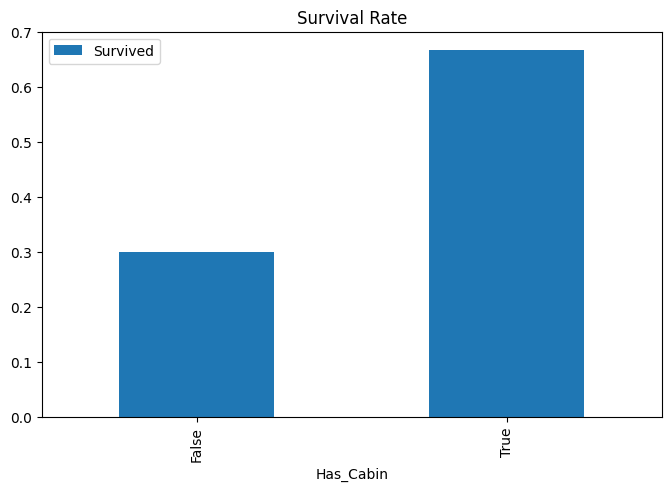

In [75]:
train_set['Has_Cabin'] = ~train_set['Cabin'].isnull()
pd.pivot_table(train_set,index=['Has_Cabin'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate')

In [76]:
# trans all the Cabin into int| only care if the value exist or not
train_set['Cabin'] = train_set['Cabin'].notnull().astype(int)
print(train_set['Cabin'])

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int32


Text(0.5, 1.0, 'Survival Rate VS Embarked')

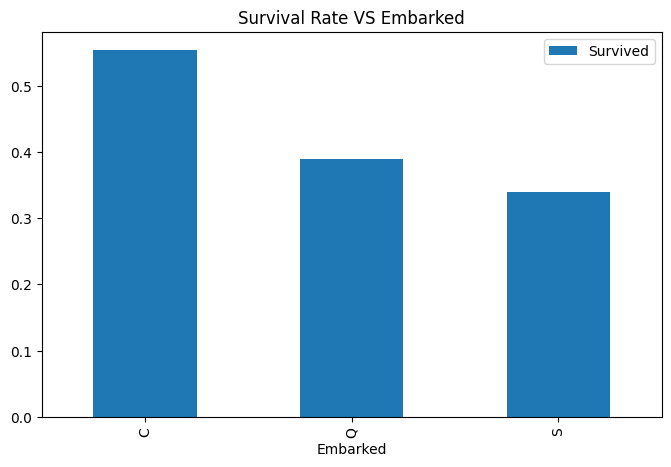

In [77]:
pd.pivot_table(train_set,index=['Embarked'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate VS Embarked')

Text(0.5, 1.0, 'Survival Rate VS Age_Group')

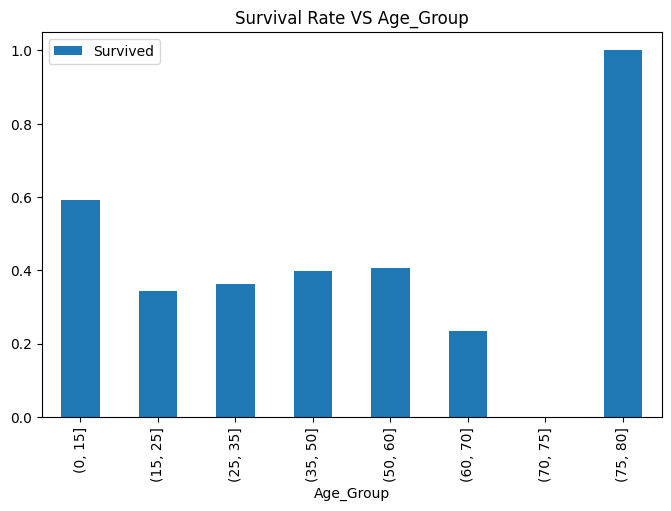

In [78]:
age_bin = [0, 15, 25, 35, 50, 60, 70, 75, 80, 100, 150] 
train_set['Age_Group'] =  pd.cut(train_set['Age'], bins=age_bin)
pd.pivot_table(train_set,index=['Age_Group'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate VS Age_Group')